### Import the required libraries 

In [6]:
import odbind as odb
from odbind.survey import Survey
from odbind.well import Well
import pandas as pd
import numpy as np

In [7]:
%load_ext autoreload
%autoreload 2

### Load the survey from Opendtect

In [8]:
sdata = Survey("UnderGrad_Proj")

### Well Data

In [9]:
wells = Well.names(sdata)

In [10]:
wells

['EBONI-01ST',
 'EBONI-02',
 'EBONI-03ST',
 'EBONI-04',
 'EBONI-04G',
 'EBONI-05G',
 'EBONI-05ST',
 'EBONI-06',
 'EBONI-07T1',
 'EBONI-10',
 'EBONI-13T1',
 'EBONI-14',
 'EBONI-14G1',
 'EBONI-14T2']

In [ ]:
import os

os.getcwd()

#### Well Logs informations

In [7]:
well1 = Well(sdata,wells[0])


well1.log_info_dataframe()

,name,mnemonic,uom,dah_range,log_range
0,AVO_Vp_1_1,,m,"[2790.2783203125, 4171.0224609375]","[2137.380615234375, 4558.8427734375]"
1,AVO_Vp_100_1,,m,"[1401.761962890625, 4171.4794921875]","[2137.380615234375, 4540.20654296875]"
2,AVO_VpVs_1,,m,"[2790.2783203125, 4171.0224609375]","[1.4392, 3.1212]"
3,AVO_VpVs_100_1,,m,"[2790.2783203125, 4171.4794921875]","[1.4895, 3.1212]"
4,DTCV_1,DT,us/ft,"[1990.4964599609375, 4171.49267578125]","[66.90570068359375, 173.4116973876953]"
5,DTCV_2,DT,us/ft,"[1990.4964599609375, 4171.49267578125]","[66.90570068359375, 173.4116973876953]"
6,ELASTIC_RHOB_1,RHOB,g/cc,"[2790.29150390625, 4179.56982421875]","[1.973520040512085, 2.605590105056763]"
7,HCAL_1,CAL,in,"[2699.91845703125, 4173.62646484375]","[5.6468, 24.669599533081055]"
8,HCAL_2,CAL,in,"[2699.91845703125, 4173.62646484375]","[5.6468, 24.669599533081055]"
9,PEM2010_INPUT_DTC_ISO_1,DT,us/ft,"[2790.13916015625, 4170.88330078125]","[66.80235290527344, 142.81463623046875]"


In [8]:
well1.track_dataframe()

,dah,tvdss,x,y
0,0.000000,0.000000,586583.6,343852.9
1,4188.256836,4188.256836,586583.6,343852.9


#### Load all the well logs into a panda dataframe

In [9]:
well_list = []

for well in wells:
    EB= Well(sdata, well)
    df = EB.logs_dataframe()[0]
    df['WELL'] = well
    well_list.append(df)    

In [10]:
well_df = pd.concat(well_list)

In [11]:
well_df.T

,0,1,2,3,4,5,6,7,8,9,...,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956
dah,1401.5,1402.0,1402.5,1403.0,1403.5,1404.0,1404.5,1405.0,1405.5,1406.0,...,5492.5,5493.0,5493.5,5494.0,5494.5,5495.0,5495.5,5496.0,5496.5,5497.0
AVO_Vp_1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVO_Vp_100_1,2241.375732,2241.375732,2241.375732,2241.375732,2241.375732,2241.375732,2241.375732,2241.375732,2241.375732,2241.375488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVO_VpVs_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVO_VpVs_100_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTCV_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTCV_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELASTIC_RHOB_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCAL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCAL_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Names of all the available columns in the df

In [12]:
hd = list(well_df.columns)

In [12]:
well_df.rename(columns={"dah":"Depth"},inplace=True)

#### select columns to be used in the example

In [13]:
sel_hd = ['Depth','PEM2010_INPUT_DTC_ISO_1',
 'PEM2010_INPUT_NP_1',
 'PEM2010_INPUT_RHOB_1',
 'PEM2010_INPUT_RT_1',
 'PEM2010_INPUT_SWE_1',
 'PEM2010_INPUT_SWT_1',
 'PEM2010_INPUT_VCL_1'
       ,'WELL'  ]

In [14]:
df = well_df[sel_hd]


In [16]:
df.head()

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1,WELL
0,1401.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-01ST
1,1402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-01ST
2,1402.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-01ST
3,1403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-01ST
4,1403.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-01ST


In [17]:
df.tail()

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1,WELL
6952,5495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-14T2
6953,5495.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-14T2
6954,5496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-14T2
6955,5496.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-14T2
6956,5497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EBONI-14T2


### Exploration Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69358 entries, 0 to 6956
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Depth                    69358 non-null  float32
 1   PEM2010_INPUT_DTC_ISO_1  12193 non-null  float32
 2   PEM2010_INPUT_NP_1       26686 non-null  float32
 3   PEM2010_INPUT_RHOB_1     26868 non-null  float32
 4   PEM2010_INPUT_RT_1       33968 non-null  float32
 5   PEM2010_INPUT_SWE_1      22958 non-null  float32
 6   PEM2010_INPUT_SWT_1      22952 non-null  float32
 7   PEM2010_INPUT_VCL_1      22937 non-null  float32
 8   WELL                     69358 non-null  object 
dtypes: float32(8), object(1)
memory usage: 5.2+ MB


In [19]:
df.describe()

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1
count,69358.000000,12193.000000,26686.000000,26868.000000,33968.000000,22958.000000,22952.000000,22937.000000
mean,2642.766357,110.505600,0.422577,2.341200,168.772507,0.273025,0.182033,0.488407
std,1176.280273,11.739655,0.139565,0.105931,829.372375,21.553541,24.561970,0.216369
min,24.000000,68.136253,0.075226,1.590536,0.139245,-999.219055,-999.249939,0.000000
25%,1929.000000,103.792740,0.354088,2.281072,0.998123,0.734355,0.929424,0.402924
50%,2734.500000,112.015625,0.441646,2.360066,1.239078,1.000000,1.000000,0.576686
75%,3415.500000,118.696121,0.506712,2.415128,1.755990,1.000000,1.000000,0.637518
max,5497.000000,140.764755,1.277386,2.608223,5000.000000,1.000000,1.000000,0.999971


In [20]:
import seaborn as sn

In [ ]:
sn.pairplot(df.dropna().reset_index().drop(columns='dah'),hue='WELL' )

#### Automatic EDA using ydata-profiling

In [ ]:
from ydata_profiling.profile_report import ProfileReport
from ydata_profiling.compare_reports import compare

In [ ]:
ProfileReport(df)

#### drop null values 

In [18]:
df_nan = df.dropna()


In [ ]:
pr1 = ProfileReport(df)

In [ ]:
pr2 = ProfileReport(df_nan)

In [ ]:
pr1.compare(pr2)

#### Remove outliers using PYOD

In [19]:
from pyod.models import lof

In [20]:
lf = lof.LOF(contamination=0.01)

In [21]:
lf.fit(df_nan.drop(columns="WELL"))

LOF(algorithm='auto', contamination=0.01, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [22]:
df_nan_an = df_nan.copy()

In [23]:
df_nan_an['anomaly'] = lf.predict(df_nan.drop(columns="WELL"))
df_nan_an

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1,WELL,anomaly
2777,2790.0,135.489365,0.910164,2.247842,0.690436,1.0,1.0,0.595230,EBONI-01ST,0
2778,2790.5,134.862427,0.818559,2.257459,0.732707,1.0,1.0,0.628471,EBONI-01ST,0
2779,2791.0,132.657059,0.583486,2.283861,0.765060,1.0,1.0,0.645806,EBONI-01ST,0
2780,2791.5,130.459320,0.494804,2.306006,0.800066,1.0,1.0,0.657633,EBONI-01ST,0
2781,2792.0,130.280014,0.488673,2.312045,0.826978,1.0,1.0,0.653210,EBONI-01ST,0
...,...,...,...,...,...,...,...,...,...,...
2552,3582.0,105.921188,0.415538,2.438645,1.315373,1.0,1.0,0.679462,EBONI-13T1,0
2553,3582.5,106.101868,0.414284,2.437156,1.261288,1.0,1.0,0.677446,EBONI-13T1,0
2554,3583.0,107.303116,0.420562,2.443460,1.219321,1.0,1.0,0.687753,EBONI-13T1,0
2555,3583.5,108.497200,0.416306,2.449511,1.183852,1.0,1.0,0.678547,EBONI-13T1,0


In [24]:
df_nan_an["scores"] = lf.decision_scores_
df_nan_an

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1,WELL,anomaly,scores
2777,2790.0,135.489365,0.910164,2.247842,0.690436,1.0,1.0,0.595230,EBONI-01ST,0,1.024116
2778,2790.5,134.862427,0.818559,2.257459,0.732707,1.0,1.0,0.628471,EBONI-01ST,0,0.972216
2779,2791.0,132.657059,0.583486,2.283861,0.765060,1.0,1.0,0.645806,EBONI-01ST,0,0.964657
2780,2791.5,130.459320,0.494804,2.306006,0.800066,1.0,1.0,0.657633,EBONI-01ST,0,0.965581
2781,2792.0,130.280014,0.488673,2.312045,0.826978,1.0,1.0,0.653210,EBONI-01ST,0,0.989609
...,...,...,...,...,...,...,...,...,...,...,...
2552,3582.0,105.921188,0.415538,2.438645,1.315373,1.0,1.0,0.679462,EBONI-13T1,0,0.989730
2553,3582.5,106.101868,0.414284,2.437156,1.261288,1.0,1.0,0.677446,EBONI-13T1,0,1.000781
2554,3583.0,107.303116,0.420562,2.443460,1.219321,1.0,1.0,0.687753,EBONI-13T1,0,0.984885
2555,3583.5,108.497200,0.416306,2.449511,1.183852,1.0,1.0,0.678547,EBONI-13T1,0,1.001932


In [25]:
import matplotlib.pyplot as plt


In [26]:
df_nan_an["anomaly"].value_counts()

anomaly
0    11919
1      102
Name: count, dtype: int64

In [27]:
inlier = df_nan[df_nan_an['anomaly']==0]
outlier = df_nan[df_nan_an['anomaly']==1]

In [ ]:
inlier

In [28]:
outlier = outlier[["PEM2010_INPUT_DTC_ISO_1"]].sort_index()

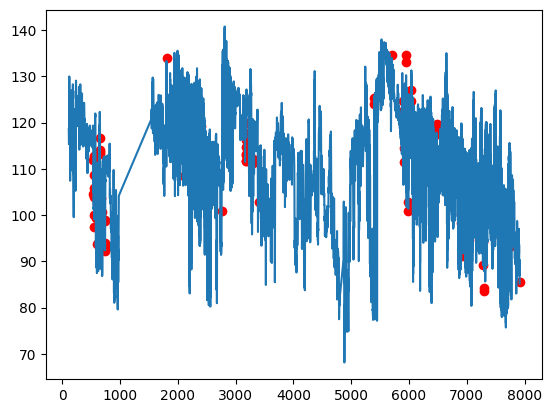

In [29]:
inlier["PEM2010_INPUT_DTC_ISO_1"].sort_index().plot()
plt.scatter(outlier.index,outlier["PEM2010_INPUT_DTC_ISO_1"],c='red' )


In [30]:
df_inliers = inlier.copy()

#### Features and targets "in this examples we use SWE as the targets"

In [17]:
df_inliers.columns

NameError: name 'df_inliers' is not defined

In [32]:
df_inliers['RT_log'] = df_inliers[['PEM2010_INPUT_RT_1']].apply(np.log)

<Axes: >

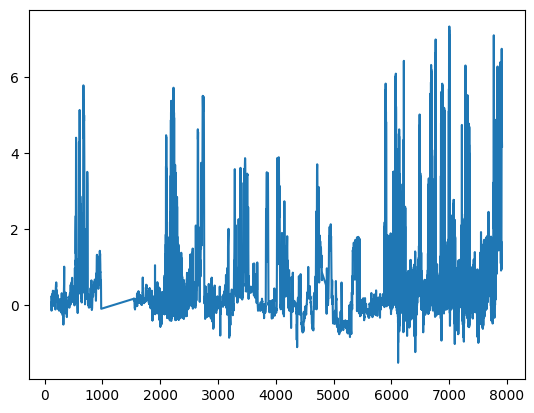

In [33]:
df_inliers['RT_log'].sort_index().plot()

### Prepare data for Model Building

In [37]:
Xdata = df_inliers.drop(columns=["PEM2010_INPUT_SWT_1","PEM2010_INPUT_SWE_1","Depth","WELL"])
ydata = df_inliers[["PEM2010_INPUT_SWE_1"]]

#### split to training and test data

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(Xdata,ydata, test_size=0.25)


NameError: name 'Xdata' is not defined

In [ ]:
x_train

In [16]:
storage_name="sqlite:///C:/Users/rasll/notebookUndergraduate-Machine-Learning-Project/notebooks/study_random.db"

In [ ]:
# Run optimization process
study = optuna.create_study(direction='minimize',storage=storage_name,load_if_exists=True)
study.optimize(objective, n_trials=100)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [45]:
from tqdm import tqdm

def gen_seq_lstm_2(X, y=None, t_step=3, n_pred=1):
    """Generates sequences of data for use in an LSTM model.

    Args:
        X (np.array): The input data.
        y (np.array, optional): The target data. Defaults to None.
        t_step (int, optional): The number of time steps in each sequence. Defaults to 3.
        n_pred (int, optional): The number of prediction steps. Defaults to 1.

    Returns:
        np.array: The sequences of data. If `y` is not None, a tuple of two np.arrays is returned,
        where the first array is the sequences of `X` and the second array is the sequences of `y`.
    """
    if isinstance(X, pd.DataFrame):
            X = X.values
    datax = []    
    if y is None:
          
        for i in tqdm(range(t_step, X.shape[0] - n_pred + 1, n_pred)):
            datax.append(X[i - t_step:i, :])
        return np.array(datax)
    
    if y is not None:
        if isinstance(y, pd.DataFrame):
            y = y.values.reshape(-1,y.shape[-1])
        datay = []
        for i in tqdm(range(t_step, X.shape[0] - n_pred + 1, n_pred)):
            y_seq = y[i:i + n_pred, :]
            if y_seq.shape[0] == n_pred:
                datay.append(y_seq)
                x_seq = X[i - t_step:i, :]
                datax.append(x_seq)            
      
        return np.array(datax), np.array(datay)

In [49]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def create_lstm_model(trial, input_shape):
    # Define hyperparameters to optimize
    units = trial.suggest_int('units', 32, 512)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    # Define LSTM model architecture
    model = Sequential([
        LSTM(units=units, input_shape=input_shape),
        Dense(1)
    ])
    
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

def objective(trial):
    # Define hyperparameters to optimize
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    #epochs = trial.suggest_int('epochs', 10, 100)
    
    # Select feature scaling technique
    scaler_name = trial.suggest_categorical('scaler', ['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
    if scaler_name == 'StandardScaler':
        scaler = StandardScaler()
    elif scaler_name == 'MinMaxScaler':
        scaler = MinMaxScaler()
    else:
        scaler = RobustScaler()
    
    # Apply feature scaling
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test) 

    t_steps = trial.suggest_int('t_steps', 3, 51)
    
    xlstm_train, ylstm_train = gen_seq_lstm_2(X_train_scaled, y_train,t_step=t_steps)
    xlstm_test, ylstm_test = gen_seq_lstm_2(X_test_scaled, y_test)
    
    # Create LSTM model
    model = create_lstm_model(trial, input_shape=(xlstm_train.shape[1], xlstm_train.shape[-1]))
    
    # Train the model
    history = model.fit(xlstm_train, ylstm_train.reshape(-1,1), batch_size=batch_size, epochs=10, validation_split=0.2, verbose=1)
    
    # Evaluate the model
    y_pred = model.predict(xlstm_test)
    mse = mean_squared_error(ylstm_test, y_pred)
    
    return mse


In [ ]:
study_lstm = optuna.create_study(direction='minimize')
study_lstm.optimize(objective,n_trials=50)

In [ ]:
### TCN Model

In [4]:
from TCN.tcn_1d import TCN
from keras.utils import plot_model

In [30]:
# Select target and features
target = 'PEM2010_INPUT_DTC_ISO_1'
features = ['Depth', 'PEM2010_INPUT_NP_1', 'PEM2010_INPUT_RHOB_1', 
            'PEM2010_INPUT_RT_1', 'PEM2010_INPUT_SWE_1', 'PEM2010_INPUT_SWT_1', 
            'PEM2010_INPUT_VCL_1']

X = df_nan[features]
y = df_nan[target]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
X_train

,Depth,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1
7101,3574.5,0.490766,2.459111,0.881851,1.0,1.0,0.723926
6280,3166.0,0.467641,2.418274,1.080415,1.0,1.0,0.522088
3686,3244.5,0.551756,2.396458,1.048520,1.0,1.0,0.673373
6699,3375.5,0.437975,2.465020,1.236589,1.0,1.0,0.602478
3273,3038.0,0.506867,2.361970,1.042271,1.0,1.0,0.585193
...,...,...,...,...,...,...,...
2500,3556.0,0.309686,2.315439,1.483386,1.0,1.0,0.406408
6685,3368.5,0.581245,2.431383,0.985287,1.0,1.0,0.578399
6884,3468.0,0.483807,2.490400,1.357844,1.0,1.0,0.625296
3637,3220.0,0.456681,2.425610,1.302737,1.0,1.0,0.544845


In [ ]:
plot_model(model1.model,dpi=200,rankdir='TB',show_shapes=True)

In [56]:
df_nan

,Depth,PEM2010_INPUT_DTC_ISO_1,PEM2010_INPUT_NP_1,PEM2010_INPUT_RHOB_1,PEM2010_INPUT_RT_1,PEM2010_INPUT_SWE_1,PEM2010_INPUT_SWT_1,PEM2010_INPUT_VCL_1,WELL,ds
2777,2790.0,135.489365,0.910164,2.247842,0.690436,1.0,1.0,0.595230,EBONI-01ST,2790.0
2778,2790.5,134.862427,0.818559,2.257459,0.732707,1.0,1.0,0.628471,EBONI-01ST,2790.5
2779,2791.0,132.657059,0.583486,2.283861,0.765060,1.0,1.0,0.645806,EBONI-01ST,2791.0
2780,2791.5,130.459320,0.494804,2.306006,0.800066,1.0,1.0,0.657633,EBONI-01ST,2791.5
2781,2792.0,130.280014,0.488673,2.312045,0.826978,1.0,1.0,0.653210,EBONI-01ST,2792.0
...,...,...,...,...,...,...,...,...,...,...
2552,3582.0,105.921188,0.415538,2.438645,1.315373,1.0,1.0,0.679462,EBONI-13T1,3582.0
2553,3582.5,106.101868,0.414284,2.437156,1.261288,1.0,1.0,0.677446,EBONI-13T1,3582.5
2554,3583.0,107.303116,0.420562,2.443460,1.219321,1.0,1.0,0.687753,EBONI-13T1,3583.0
2555,3583.5,108.497200,0.416306,2.449511,1.183852,1.0,1.0,0.678547,EBONI-13T1,3583.5


In [19]:
from salami.ml.preproc.data_prep import generate_lstm_sequences

In [33]:
y_train.values

array([111.80915 , 112.46974 , 115.03588 , ..., 103.716736, 106.61542 ,
       106.93725 ], dtype=float32)

In [36]:
# Standardize the features
scaler = StandardScaler().set_output(transform='pandas')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for TCN input (samples, timesteps, features)
X_train_scaled,y_train_lstm = generate_lstm_sequences(X_train_scaled,y_train,time_steps=11)
X_test_scaled,y_test_lstm = generate_lstm_sequences(X_test_scaled,y_test,time_steps=11)



100%|██████████████████████████████████████████████████████████████████████████| 2394/2394 [00:00<00:00, 399235.17it/s]


In [37]:
in_shap = (X_train_scaled.shape[1],X_train_scaled.shape[-1])

In [38]:
X_train_scaled.shape, X_test_scaled.shape

((9605, 11, 7), (2394, 11, 7))

In [39]:
tcn_model = TCN(input_shape=in_shap)

NameError: name 'TCN' is not defined

In [180]:
tmodel = tcn_model.model

In [5]:
plot_model(tmodel,show_shapes=True,dpi=100)

NameError: name 'tmodel' is not defined

In [182]:
tmodel.compile(loss='mse')

In [183]:
hist = tmodel.fit(X_train_scaled,y_train_lstm,epochs=10)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 5087.7046
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 141.5121
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 136.5910
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 147.4193
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 135.2053
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 139.9555
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 137.3058
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 139.3840
Epoch 9/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 131.9000
Epoch 10/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 133.3544


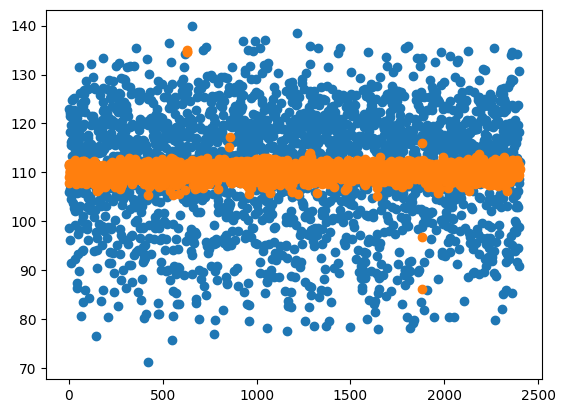

In [186]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(y_test_lstm.shape[0]),y_test_lstm)
plt.scatter(np.arange(y_pred.shape[0]),y_pred)

In [185]:
y_pred = tmodel.predict(X_test_scaled)

76/76 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step


In [172]:
X_test_scaled.shape

(2402, 3, 7)

In [167]:
tmodel.predict(X_test_scaled)

ValueError: Layer 'functional_1' expected 1 input(s). Received 2 instead.